# Plotting the data from the history file

There are a sample history.data and profiles in this directory, so you can experiment before getting your own models.

Load the python libraries that we will need -- numpy and matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Load the data from the history file.  It has a five header rows and then a row with the names of all of columns

In [2]:
data=np.genfromtxt("history.data",skip_header=5,names=True,unpack=True)

Plot luminosity against effective temperature (why is it a straight line?)

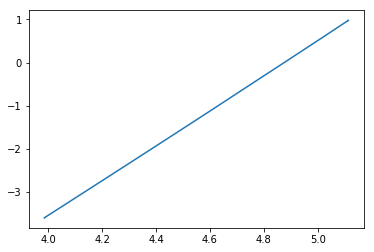

In [3]:
plt.plot(data['log_Teff'],data['log_L'])
plt.show()

Plot luminosity against age (what are the different regimes?)

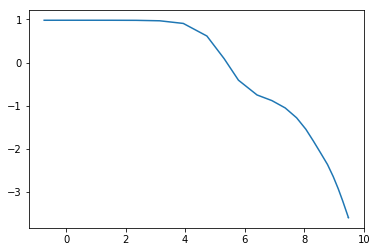

In [4]:
plt.plot(np.log10(data['star_age']),data['log_L'])
plt.show()

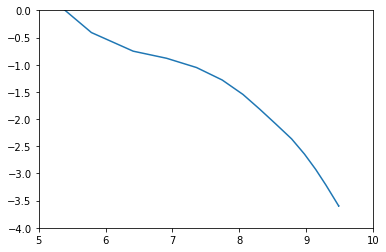

In [5]:
plt.plot(np.log10(data['star_age']),data['log_L'])
plt.xlim(5,10)
plt.ylim(-4,0)
plt.show()

# Convert MESA output to observable magnitudes
Add the observable absolute magnitudes to the history data

In [6]:
run ./paintisochrone.py history.data colmag.Bergeron_New.all.Vega.txt paintedhistory.data

In [7]:
pdata=np.genfromtxt("paintedhistory.data",names=True,skip_header=1,unpack=True)

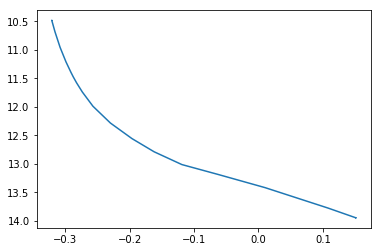

In [8]:
plt.plot(pdata['F606W']-pdata['F814W'],pdata['F814W'])
plt.gca().invert_yaxis()
plt.show()

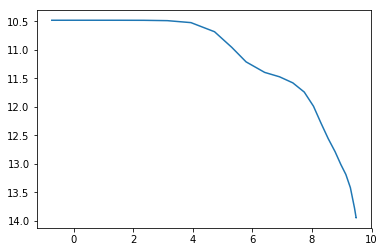

In [9]:
plt.plot(np.log10(pdata['star_age']),pdata['F814W'])
plt.gca().invert_yaxis()
plt.show()

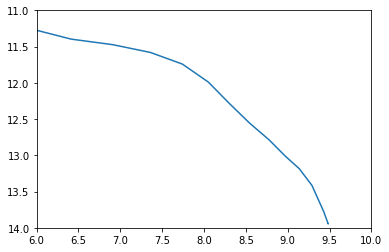

In [10]:
plt.plot(np.log10(pdata['star_age']),pdata['F814W'])
plt.xlim(6,10)
plt.ylim(11,14)
plt.gca().invert_yaxis()
plt.show()

Load the cumulative luminosity function from 47 Tuc

In [19]:
data47=np.genfromtxt("47tuc_fromIR.dat",names=True,skip_header=1,unpack=True)

Plot the magnitude against age including a guess for the distance moduls (13.45)
Plot the cumulative luminosity function with a birth rate of 1 per 6e6 year (another guess).

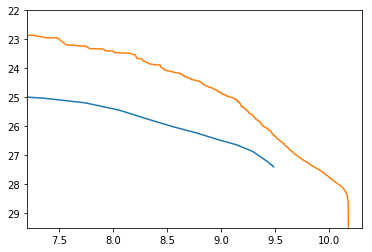

In [20]:
plt.plot(np.log10(pdata['star_age']),pdata['F814W']+13.45)
plt.plot(np.log10(data47['cumweight']*6e6),data47['F814'])
plt.xlim(7.2,10.3)
plt.ylim(22,29.5)
plt.gca().invert_yaxis()
plt.show()

Clearly this sample model isn't a good fit.  What about the colour-magnitude diagram?

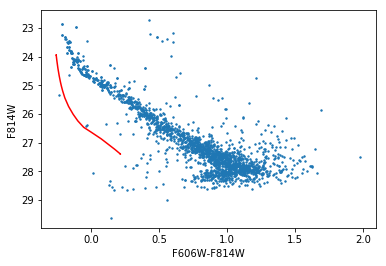

In [21]:
plt.scatter(data47['F606mF814'],data47['F814'],s=2)
plt.plot(pdata['F606W']-pdata['F814W']+0.065,pdata['F814W']+13.45,c='r')
plt.gca().invert_yaxis()
plt.xlabel('F606W-F814W')
plt.ylabel('F814W')
plt.show()

# Examining the profile files
Let's look at some profile files

In [22]:
data1=np.genfromtxt("profile1.data",names=True,skip_header=5,unpack=True)
data8=np.genfromtxt("profile8.data",names=True,skip_header=5,unpack=True)
data10=np.genfromtxt("profile10.data",names=True,skip_header=5,unpack=True)
data29=np.genfromtxt("profile29.data",names=True,skip_header=5,unpack=True)

Plot density against temperature

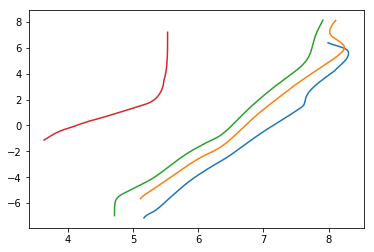

In [23]:
plt.plot(data1['logT'],data1['logRho'])
plt.plot(data8['logT'],data8['logRho'])
plt.plot(data10['logT'],data10['logRho'])
plt.plot(data29['logT'],data29['logRho'])
plt.show()

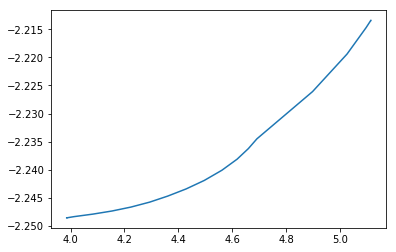

In [24]:
plt.plot(data['log_Teff'],data['log_R'])
plt.show()

# Combining Data 
You can mix data from the painted file and the original history file in the same plot, because they have the same number of elememts!

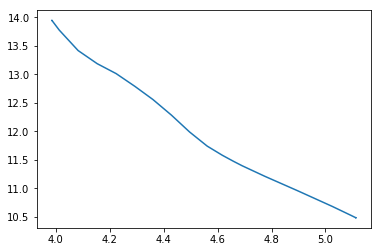

In [25]:
plt.plot(data['log_Teff'],pdata['F814W'])
plt.show()

In [26]:
data['star_mass'][-1]

1.1712978546040329

# Let's work with the UV data now

In [27]:
data47UV=np.genfromtxt("47tuc_fromUV.dat",names=True,skip_header=1,unpack=True)

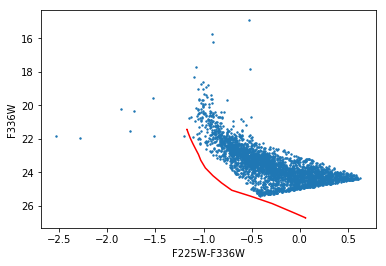

In [28]:
plt.scatter(data47UV['F225mF336'],data47UV['F336'],s=2)
plt.plot(pdata['F225W']-pdata['F336W'],pdata['F336W']+13.45,c='r')
plt.gca().invert_yaxis()
plt.xlabel('F225W-F336W')
plt.ylabel('F336W')
plt.show()

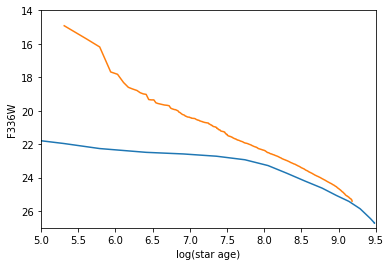

In [31]:
plt.plot(np.log10(pdata['star_age']),pdata['F336W']+13.45)
plt.plot(np.log10(data47UV['cumweight']*2e5),data47UV['F336'])
plt.xlim(5,9.5)
plt.ylim(14,27)
plt.gca().invert_yaxis()
plt.xlabel('log(star age)')
plt.ylabel('F336W')
plt.show()